In [1]:
# Train_Data = 498
# Test_Data = 177

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow

tensorflow.__version__

'2.6.0'

In [3]:
# 1. Google Drive Mount

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Mar 31  2021 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


In [5]:
# 2. Data Preprocessing

!unzip '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: test/Citroen/Citroen_11.jpg  
 extracting: test/Citroen/Citroen_15.png  
 extr

In [6]:
train_dir = 'train'
valid_dir = 'test' # 데이터가 부족한 관계로
test_dir = 'test'

In [8]:
# Normalization -> ImageDataGenerator()
# Resizing & Generator -> flow_from_directory()

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (75, 75),
                  batch_size = 8,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (75, 75),
                  batch_size = 8,
                  class_mode = 'categorical')

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (8, 75, 75, 3)
배치 레이블 크기: (8, 27)


In [10]:
labels_batch

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

In [11]:
# 3. CNN Keras Modeling

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(75,75,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch=62,
                       epochs=200,
                       validation_data = valid_generator,
                       validation_steps = 22)

Epoch 1/200
62/62 [==============================] - 9s 124ms/step - loss: 3.1954 - accuracy: 0.0918 - val_loss: 3.0167 - val_accuracy: 0.1761
Epoch 2/200
62/62 [==============================] - 7s 117ms/step - loss: 2.5494 - accuracy: 0.3000 - val_loss: 2.5026 - val_accuracy: 0.2443
Epoch 3/200
62/62 [==============================] - 7s 118ms/step - loss: 1.7056 - accuracy: 0.5184 - val_loss: 2.2732 - val_accuracy: 0.4148
Epoch 4/200
62/62 [==============================] - 7s 117ms/step - loss: 1.1146 - accuracy: 0.6898 - val_loss: 2.3186 - val_accuracy: 0.3920
Epoch 5/200
62/62 [==============================] - 7s 117ms/step - loss: 0.6513 - accuracy: 0.8082 - val_loss: 2.2525 - val_accuracy: 0.5341
Epoch 6/200
62/62 [==============================] - 7s 117ms/step - loss: 0.4177 - accuracy: 0.8837 - val_loss: 2.6815 - val_accuracy: 0.5568
Epoch 7/200
62/62 [==============================] - 7s 118ms/step - loss: 0.3377 - accuracy: 0.9102 - val_loss: 2.8678 - val_accuracy: 0.4886

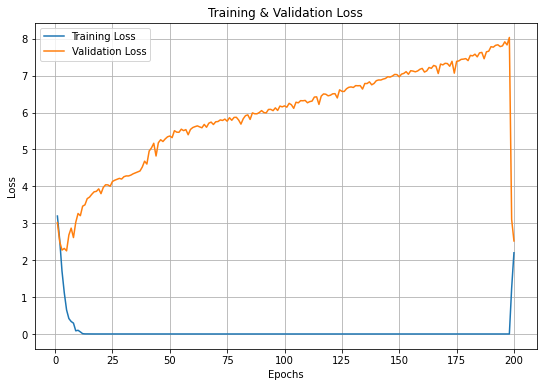

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

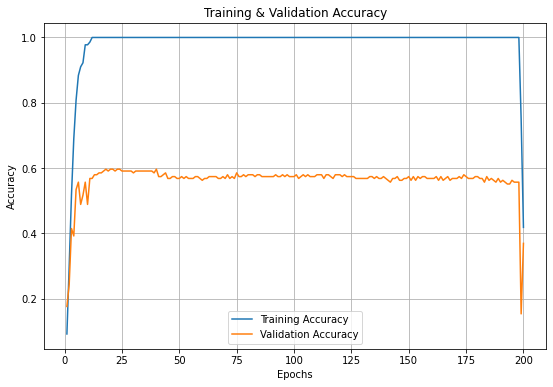

In [21]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (75, 75),
                 batch_size = 8,
                 class_mode = 'categorical')

Found 177 images belonging to 27 classes.


In [19]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 22)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

22/22 [==============================] - 1s 32ms/step - loss: 2.5117 - accuracy: 0.3750
Loss = 2.51165
Accuracy = 0.37500
